#               Primary Insights

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Players

In [83]:
players = pd.read_csv('dataset/dim_players.csv')
players.head(3)

,name,team,battingStyle,bowlingStyle,playingRole
0,RuturajGaikwad,Super Kings,Right hand Bat,Right arm Offbreak,Batter
1,FafduPlessis,Super Kings,Right hand Bat,Legbreak,Middle order Batter
2,RobinUthappa,Super Kings,Right hand Bat,Right arm Medium,Batter


### Batting Summary

In [84]:
bating_summary = pd.read_csv('dataset/fact_bating_summary.csv')
bating_summary.head(3)

,match_id,match,teamInnings,battingPos,batsmanName,out/not_out,runs,balls,4s,6s,SR
0,T203817,Super Kings Vs KKR,Super Kings,1,RuturajGaikwad,out,32,27,3,1,118.51
1,T203817,Super Kings Vs KKR,Super Kings,2,FafduPlessis,out,86,59,7,3,145.76
2,T203817,Super Kings Vs KKR,Super Kings,3,RobinUthappa,out,31,15,0,3,206.66


### Top 10 batsmen based on past 3 years total runs scored.

In [85]:
# Assuming bating_summary is your DataFrame containing batsmen's data
# and it has columns 'batsmanName' and 'runs'

# Assuming top_10_batsmen is already calculated using groupby and nlargest
top_10_batsmen = bating_summary.groupby('batsmanName')['runs'].sum().nlargest(10)

# Convert the Series to DataFrame with specified columns
top_10_batsmen_df = pd.DataFrame({'Batsman Name': top_10_batsmen.index,
                                  'Total Runs': top_10_batsmen.values})

top_10_batsmen_df


,Batsman Name,Total Runs
0,ShubmanGill,1851
1,FafduPlessis,1831
2,RuturajGaikwad,1593
3,KLRahul,1516
4,JosButtler,1509
5,ShikharDhawan,1392
6,ViratKohli,1385
7,SanjuSamson,1304
8,SuryakumarYadav,1225
9,GlennMaxwell,1214


### Visualization

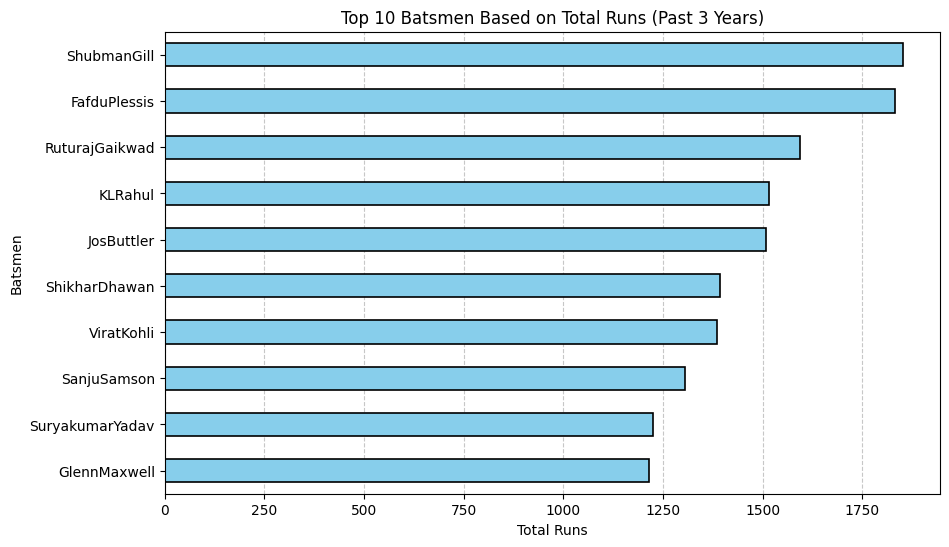

In [86]:
# Plotting the top 10 batsmen based on total runs scored in the past 3 years.

top_10_batsmen.plot(kind='barh', figsize=(10, 6), color='skyblue', edgecolor='black', linewidth=1.2, zorder=2)
plt.xlabel('Total Runs')
plt.ylabel('Batsmen')
plt.title('Top 10 Batsmen Based on Total Runs (Past 3 Years)')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest average at the top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

### Match Summary

In [87]:
# Read Match Summary

match_summary = pd.read_csv('dataset/dim_match_summary.csv')
match_summary.head(3)

,team1,team2,winner,margin,matchDate,match_id
0,Super Kings,KKR,Super Kings,27 runs,"Oct 15, 2021",T203817
1,Capitals,KKR,KKR,3 wickets,"Oct 13, 2021",T206442
2,RCB,KKR,KKR,4 wickets,"Oct 11, 2021",T208597


#### Merge batting Summary and Match Summary on Match ID

In [89]:
# merge the batting_summary and match_summary dataframes on match_id column.

batting_summary = batting_summary.merge(match_summary[['match_id', 'matchDate']], on='match_id')
batting_summary.head(3)

,match_id,match,teamInnings,battingPos,batsmanName,out/not_out,runs,balls,4s,6s,SR,matchDate
0,T203817,Super Kings Vs KKR,Super Kings,1,RuturajGaikwad,out,32,27,3,1,118.51,"Oct 15, 2021"
1,T203817,Super Kings Vs KKR,Super Kings,2,FafduPlessis,out,86,59,7,3,145.76,"Oct 15, 2021"
2,T203817,Super Kings Vs KKR,Super Kings,3,RobinUthappa,out,31,15,0,3,206.66,"Oct 15, 2021"


#### Top 10 batsmen based on past 3 years batting average. (min 60 balls faced in each season)

In [91]:
# Assuming batting_summary is your DataFrame containing batting data and it has columns 'matchDate', 'batsmanName', 'balls', and 'runs'

# Filter the batting_summary dataframe to include only the qualified batsmen for each year
qualified_batsmen = batting_summary.groupby([batting_summary['matchDate'].str[-4:], 'batsmanName']).filter(lambda x: x['balls'].sum() >= 60)

# Calculate the batting average for each year
batting_average = qualified_batsmen.groupby([qualified_batsmen['matchDate'].str[-4:], 'batsmanName'])['runs'].mean()

# Reshape the data to have years as columns and batsmen as rows
batting_average_pivot = batting_average.unstack(level=0)

# Get the mean across the years for each batsman
mean_batting_average = batting_average_pivot.mean(axis=1).round(2)

# Get the top 10 batsmen based on mean batting average
top_10_batsmen_avg = mean_batting_average.nlargest(10)

# Convert the Series to DataFrame with specified columns
top_10_batsmen_avg_df = pd.DataFrame({'Batsman Name': top_10_batsmen_avg.index,
                                      'Average': top_10_batsmen_avg.values})

top_10_batsmen_avg_df


,Batsman Name,Average
0,HeinrichKlaasen,40.73
1,DevonConway,40.40
2,FafduPlessis,40.32
3,KLRahul,39.89
4,JosButtler,38.35
5,SaiSudharsan,37.12
6,ShubmanGill,36.89
7,RuturajGaikwad,35.10
8,ShikharDhawan,34.68
9,DavidWarner,33.29


### Visualization

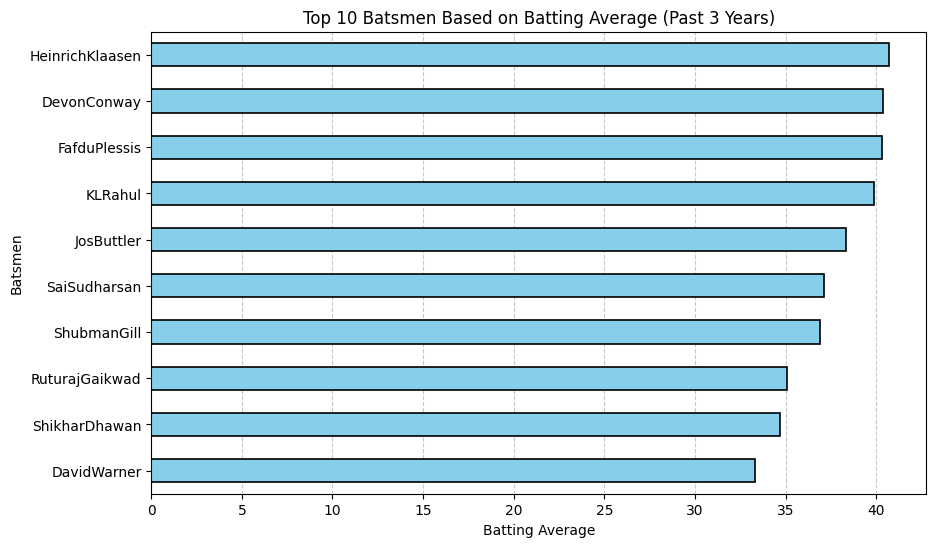

In [92]:
# Plotting the top 10 batsmen based on batting average in the past 3 years.

top_10_batsmen_avg.plot(kind='barh', figsize=(10, 6), color='skyblue', edgecolor='black', linewidth=1.2, zorder=2)
plt.xlabel('Batting Average')
plt.ylabel('Batsmen')
plt.title('Top 10 Batsmen Based on Batting Average (Past 3 Years)')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest average at the top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

#### Top 10 batsmen based on past 3 years strike rate (min 60 balls faced in each season)

In [93]:
# Filter the batting_summary dataframe to include only the qualified batsmen for each year
qualified_batsmen = batting_summary.groupby([batting_summary['matchDate'].str[-4:], 'batsmanName']).filter(lambda x: x['balls'].sum() >= 60)

# change the datatype of the SR column to float
qualified_batsmen['SR'] = qualified_batsmen['SR'].str.replace('-', '0').astype(float)

# Calculate the batting average for each year
batting_average = qualified_batsmen.groupby([qualified_batsmen['matchDate'].str[-4:], 'batsmanName'])['SR'].mean()

# Reshape the data to have years as columns and batsmen as rows
batting_average_pivot = batting_average.unstack(level=0)

# Get the mean across the years for each batsman
mean_batting_average = batting_average_pivot.mean(axis=1).round(2)

# Get the top 10 batsmen based on mean batting average
top_10_batsmen_avg = mean_batting_average.nlargest(10)

# Convert the Series to DataFrame with specified columns
top_10_batsmen_avg_df = pd.DataFrame({'Batsman Name': top_10_batsmen_avg.index,
                                      'Strike Rate': top_10_batsmen_avg.values})

top_10_batsmen_avg_df

,Batsman Name,Strike Rate
0,HeinrichKlaasen,182.17
1,EvinLewis,165.90
2,TimDavid,160.44
3,JiteshSharma,157.71
4,GlennMaxwell,150.93
5,VijayShankar,149.70
6,LiamLivingstone,148.60
7,DhruvJurel,146.30
8,SaurabhTiwary,144.99
9,RishabhPant,144.16


### Visualization

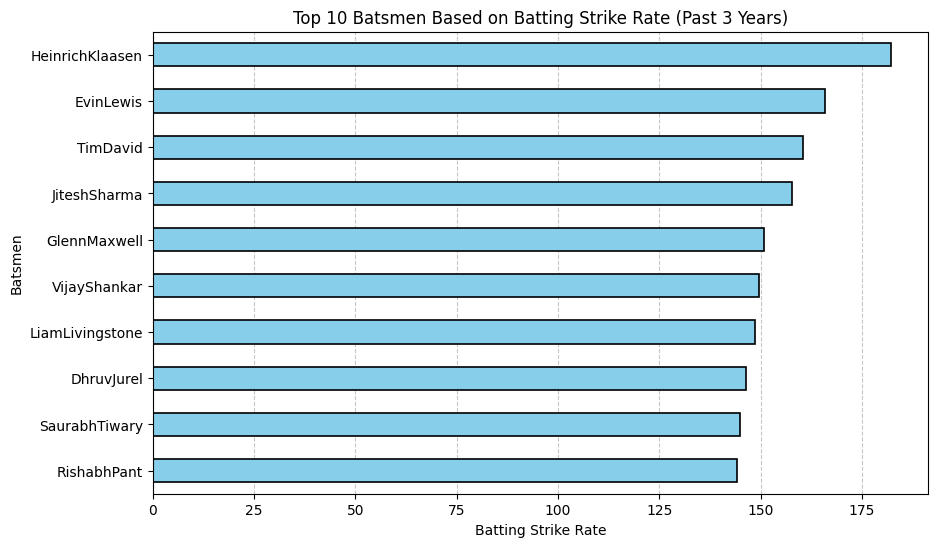

In [94]:
# Plotting the top 10 batsmen based on batting strike rate in the past 3 years.

top_10_batsmen_avg.plot(kind='barh', figsize=(10, 6), color='skyblue', edgecolor='black', linewidth=1.2, zorder=2)
plt.xlabel('Batting Strike Rate')
plt.ylabel('Batsmen')
plt.title('Top 10 Batsmen Based on Batting Strike Rate (Past 3 Years)')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest average at the top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

### Bowling Summary

In [95]:
# read the bowling_summary dataframe

bowling_summary = pd.read_csv('dataset/fact_bowling_summary.csv')
bowling_summary.head(3)

,match_id,match,bowlingTeam,bowlerName,overs,maiden,runs,wickets,economy,0s,4s,6s,wides,noBalls
0,T203817,Super Kings Vs KKR,KKR,ShakibAlHasan,3.0,0,33,0,11.0,6,2,3,0,0
1,T203817,Super Kings Vs KKR,KKR,ShivamMavi,4.0,0,32,1,8.0,8,1,2,0,0
2,T203817,Super Kings Vs KKR,KKR,LockieFerguson,4.0,0,56,0,14.0,4,7,2,2,0


### Top 10 bowlers based on past 3 years total wickets taken.

In [101]:
# Assuming bowling_summary is your DataFrame containing bowlers' data and it has columns 'bowlerName' and 'Total wickets'

# Assuming top_10_bowlers is already calculated using groupby and nlargest
top_10_bowlers = bowling_summary.groupby('bowlerName')['wickets'].sum().nlargest(10)

# Convert the Series to DataFrame with specified columns
top_10_bowlers_df = pd.DataFrame({'Bowler Name': top_10_bowlers.index,
                                  'Total Wickets': top_10_bowlers.values})

top_10_bowlers_df


,Bowler Name,Total Wickets
0,MohammedShami,67
1,YuzvendraChahal,66
2,HarshalPatel,65
3,RashidKhan,63
4,AveshKhan,47
5,ArshdeepSingh,45
6,KagisoRabada,45
7,VarunChakravarthy,44
8,ShardulThakur,43
9,TrentBoult,42


### Visualization

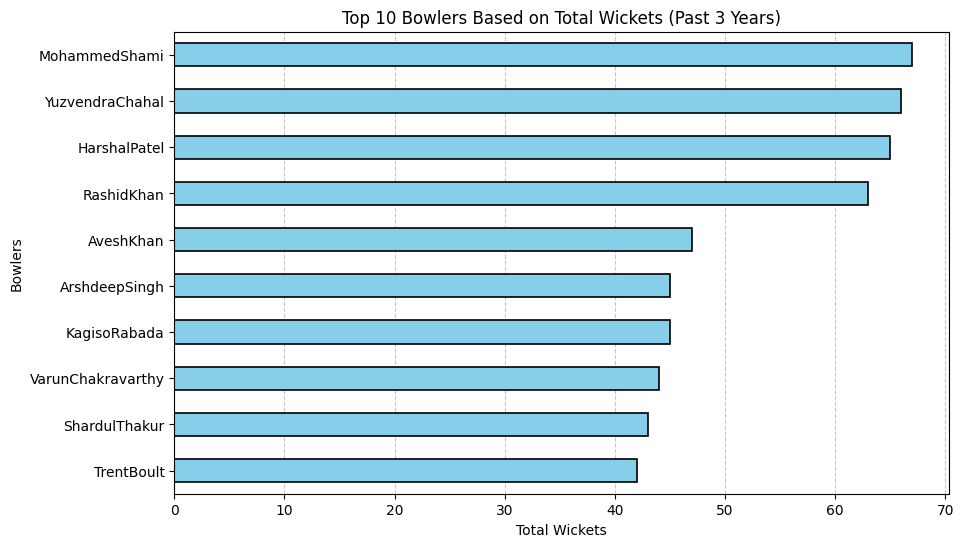

In [97]:
# Plotting the top 10 bowlers based on total wickets taken in the past 3 years.

top_10_bowlers.plot(kind='barh', figsize=(10, 6), color='skyblue', edgecolor='black', linewidth=1.2, zorder=2)
plt.xlabel('Total Wickets')
plt.ylabel('Bowlers')
plt.title('Top 10 Bowlers Based on Total Wickets (Past 3 Years)')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest average at the top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

### Merge the bowling summary and match summary DataFrames on Match Id

In [98]:
# Merge the bowling_summary and match_summary DataFrames on match_id column

bowling_summary = bowling_summary.merge(match_summary[['match_id', 'matchDate']], on='match_id')
bowling_summary.head(3)

,match_id,match,bowlingTeam,bowlerName,overs,maiden,runs,wickets,economy,0s,4s,6s,wides,noBalls,matchDate
0,T203817,Super Kings Vs KKR,KKR,ShakibAlHasan,3.0,0,33,0,11.0,6,2,3,0,0,"Oct 15, 2021"
1,T203817,Super Kings Vs KKR,KKR,ShivamMavi,4.0,0,32,1,8.0,8,1,2,0,0,"Oct 15, 2021"
2,T203817,Super Kings Vs KKR,KKR,LockieFerguson,4.0,0,56,0,14.0,4,7,2,2,0,"Oct 15, 2021"


### Convert 'matchDate' column to datetime format

In [105]:
# Assuming bowling_summary is your DataFrame
# Convert 'matchDate' column to datetime format
bowling_summary['matchDate'] = pd.to_datetime(bowling_summary['matchDate'])
bowling_summary.head(3)

,match_id,match,bowlingTeam,bowlerName,overs,maiden,runs,wickets,economy,0s,4s,6s,wides,noBalls,matchDate
0,T203817,Super Kings Vs KKR,KKR,ShakibAlHasan,3.0,0,33,0,11.0,6,2,3,0,0,2021-10-15
1,T203817,Super Kings Vs KKR,KKR,ShivamMavi,4.0,0,32,1,8.0,8,1,2,0,0,2021-10-15
2,T203817,Super Kings Vs KKR,KKR,LockieFerguson,4.0,0,56,0,14.0,4,7,2,2,0,2021-10-15


#### Top 10 bowlers based on past 3 years bowling average. (min 60 balls bowled in each season)

In [111]:
# Calculate the bowling average for each bowler
bowling_average = qualified_bowler.groupby([qualified_bowler['matchDate'].dt.year, 'bowlerName'])[['runs', 'wickets']].sum()
bowling_average['bowling_average'] = bowling_average['runs'] / bowling_average['wickets']

# Reshape the data to have years as columns and bowlers as rows
bowling_average_pivot = bowling_average['bowling_average'].unstack(level=0)

# Get the mean across the years for each bowler
mean_bowling_average = bowling_average_pivot.mean(axis=1).round(2)

# Get the top 10 bowlers based on mean bowling average
top_10_bowling_avg = mean_bowling_average.nsmallest(10)  # Assuming bowling average should be smallest

# Convert the Series to DataFrame with specified columns
top_10_bowling_avg_df = pd.DataFrame({'Bowler Name': top_10_bowling_avg.index,
                                      'Avg Bowling Average': top_10_bowling_avg.values})

top_10_bowling_avg_df

,Bowler Name,Avg Bowling Average
0,MoisesHenriques,11.25
1,MarkWood,11.82
2,MohitSharma,13.37
3,AkashMadhwal,15.64
4,MichaelBracewell,15.83
5,ChrisWoakes,16.40
6,NathanCoulter-Nile,18.14
7,AmitMishra,18.44
8,DwayneBravo,18.74
9,AndreRussell,19.34


### Visualization

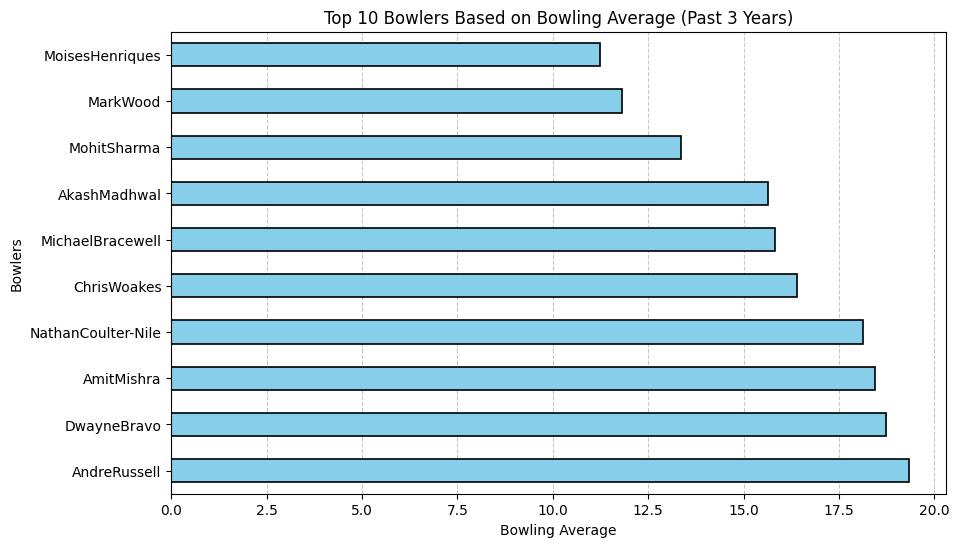

In [112]:
# Plotting the top 10 bowlers based on bowling average in the past 3 years.

top_10_bowling_avg.plot(kind='barh', figsize=(10, 6), color='skyblue', edgecolor='black', linewidth=1.2, zorder=2)
plt.xlabel('Bowling Average')
plt.ylabel('Bowlers')
plt.title('Top 10 Bowlers Based on Bowling Average (Past 3 Years)')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest average at the top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

#### Top 10 bowlers based on past 3 years economy rate. (min 60 balls bowled in each season)

In [113]:
# Filter the bowling_summary dataframe to include only the qualified bowlers for each year
qualified_bowler = bowling_summary.groupby([bowling_summary['matchDate'].dt.year, 'bowlerName']).filter(lambda x: x['overs'].sum() >= 10)

# Calculate the bowling average for each year
bowling_average = qualified_bowler.groupby([qualified_bowler['matchDate'].dt.year, 'bowlerName'])['economy'].mean()

# Reshape the data to have years as columns and bowlers as rows
bowling_average_pivot = bowling_average.unstack(level=0)

# Get the mean across the years for each bowler
mean_bowling_average = bowling_average_pivot.mean(axis=1).round(2)

# Get the top 10 bowlers based on mean bowling average
top_10_bowling_avg = mean_bowling_average.nsmallest(10)  # Assuming bowling average should be smallest

# Convert the Series to DataFrame with specified columns
top_10_bowling_avg_df = pd.DataFrame({'Bowler Name': top_10_bowling_avg.index,
                                      'Avg Eco': top_10_bowling_avg.values})

top_10_bowling_avg_df

,Bowler Name,Avg Eco
0,MoisesHenriques,5.60
1,NathanCoulter-Nile,6.35
2,DavidWilley,6.61
3,MitchellSantner,6.72
4,SunilNarine,6.72
5,ShakibAlHasan,7.03
6,RashidKhan,7.18
7,AxarPatel,7.22
8,ChrisWoakes,7.33
9,JaspritBumrah,7.33


### Visualization

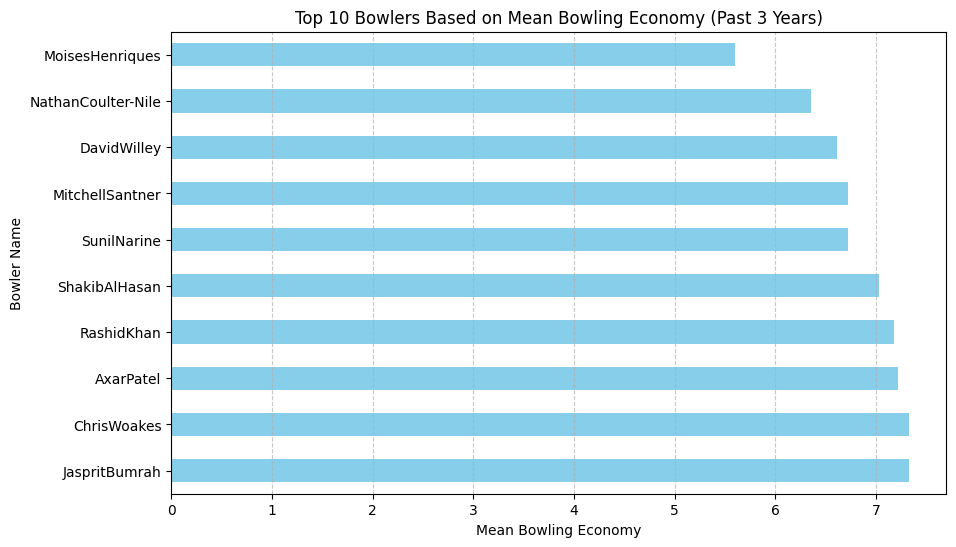

In [114]:
# Plotting the top 10 bowlers based on mean bowling average
plt.figure(figsize=(10, 6))
top_10_bowling_avg.plot(kind='barh', color='skyblue')
plt.xlabel('Mean Bowling Economy')
plt.ylabel('Bowler Name')
plt.title('Top 10 Bowlers Based on Mean Bowling Economy (Past 3 Years)')
plt.gca().invert_yaxis()  
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


### Bating Summary 

In [117]:
data = pd.read_csv('dataset/fact_bating_summary.csv')
data.head(3)

,match_id,match,teamInnings,battingPos,batsmanName,out/not_out,runs,balls,4s,6s,SR
0,T203817,Super Kings Vs KKR,Super Kings,1,RuturajGaikwad,out,32,27,3,1,118.51
1,T203817,Super Kings Vs KKR,Super Kings,2,FafduPlessis,out,86,59,7,3,145.76
2,T203817,Super Kings Vs KKR,Super Kings,3,RobinUthappa,out,31,15,0,3,206.66


#### Top 5 batsmen based on past 3 years boundary % (fours and sixes).

In [119]:
# Assuming your data is stored in a DataFrame named 'data'

# Calculate total boundaries (4s and 6s) for each batsman
boundary_count = data.groupby('batsmanName')[['4s', '6s']].sum()

# Calculate total balls faced by each batsman
balls_faced = data.groupby('batsmanName')['balls'].sum()

# Calculate boundary percentage for each batsman
boundary_percentage = ((boundary_count['4s'] + boundary_count['6s']) / balls_faced * 100).round(2)

# Sort batsmen based on boundary percentage and select top 5
top_5_boundary_percent = boundary_percentage.nlargest(5)

# Convert the Series to DataFrame with specified columns
top_5_boundary_percent_df = pd.DataFrame({'Batsman Name': top_5_boundary_percent.index,
                                         'Boundary %': top_5_boundary_percent.values})

top_5_boundary_percent_df

,Batsman Name,Boundary Per%
0,MarkWood,40.00
1,AkashDeep,30.00
2,PatCummins,30.00
3,DavidWiese,27.27
4,RashidKhan,25.58
